In [13]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import sys

In [14]:
np.set_printoptions(suppress=True)

In [15]:
xs = np.array([1, 2, 3, 4], dtype=np.float64)
ys= np.array([5.7, 7.6, 8.9, 9.4], dtype=np.float64)

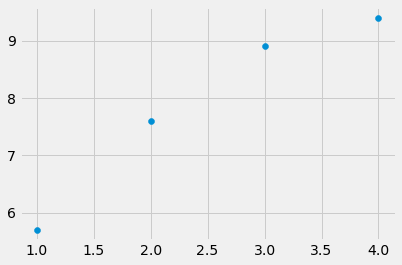

In [16]:
style.use('fivethirtyeight')
plt.scatter(xs, ys)

In [17]:
# y = mx + b
def best_fit_slope_and_intercept(xs, ys):
  m = (mean(xs)*mean(ys) - mean(xs*ys)) / (mean(xs)**2 - mean(xs**2))
  b = mean(ys) - m*mean(xs) 
  return m, b

In [18]:
def squared_error(ys_orig, ys_line):
  return sum((ys_line - ys_orig)**2)

def coefficient_of_determination(ys_orig, ys_line):
  y_mean_line = np.mean(ys_orig)
  squared_error_regr = squared_error(ys_orig, ys_line)
  squared_error_y_mean = squared_error(ys_orig, y_mean_line)
  return 1 - (squared_error_regr / squared_error_y_mean)

In [19]:
m, b = best_fit_slope_and_intercept(xs, ys)
m, b

(1.2400000000000007, 4.799999999999999)

In [20]:
regression_line = [(m*x) + b for x in xs]
regression_line

[6.039999999999999, 7.28, 8.520000000000001, 9.760000000000002]

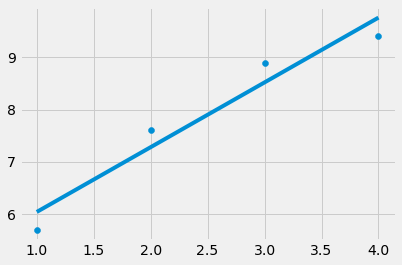

In [21]:
plt.scatter(xs, ys)
plt.plot(xs, regression_line)

In [22]:
error = coefficient_of_determination(ys ,regression_line)
error

0.9398533007334965

# POLYNOMIAL REGRESSION

In [23]:
# y = b0 + b1x + b2x^2 + b3x^3
xs = np.array([1, 2, 3, 4, 5], dtype=np.float64)
ys= np.array([19, 61, 157, 331, 607], dtype=np.float64)

ones = np.array([1 for i in range(0,len(xs))])
power_of_x = np.array([x**2 for x in xs])
cube_of_x = np.array([x**3 for x in xs])

xy = sum(xs * ys)
x2y = sum(power_of_x * ys)
x3y = sum(cube_of_x * ys)

m1 = np.array([[sum(ys)], [xy], [x2y], [x3y]])

# XT * X
X = np.array([ones, xs, power_of_x, cube_of_x])
X_transpose = X.T
dot = np.dot(X, X_transpose)

In [24]:
c1 = np.concatenate((dot, m1), axis=1)
c1

array([[     5.,     15.,     55.,    225.,   1175.],
       [    15.,     55.,    225.,    979.,   4971.],
       [    55.,    225.,    979.,   4425.,  22147.],
       [   225.,    979.,   4425.,  20515., 101805.]])

In [25]:
# GAUSSIAN ELIMINATION
def gaussian_elimination(n, c1):
  """
  n: number of unknowns
  c1: matrix
  """
  b = np.zeros(n)

  for i in range(n):
      if c1[i][i] == 0.0:
          sys.exit('Divide by zero detected!')
          
      for j in range(i+1, n):
          ratio = c1[j][i]/c1[i][i]
          
          for k in range(n+1):
              c1[j][k] = c1[j][k] - ratio * c1[i][k]
  
  b[n-1] = c1[n-1][n]/c1[n-1][n-1]
  
  for i in range(n-2,-1,-1):
      b[i] = c1[i][n]
      
      for j in range(i+1,n):
          b[i] = b[i] - c1[i][j]*b[j]
      
      b[i] = b[i]/c1[i][i]
  
  print('\nThe solution is: ')
  for i in range(n):
      print('B%d = %0.2f' %(i,b[i]), end = '\t')
  return b

In [26]:
b = gaussian_elimination(4, c1)


The solution is: 
B0 = 7.00	B1 = 5.00	B2 = 3.00	B3 = 4.00	

In [27]:
poly_regression = [b[0] + (b[1] * x) + (b[2] * x**2) + (b[3] * x **3) for x in xs]
poly_regression

[19.0, 61.0, 157.0, 331.0, 607.0]

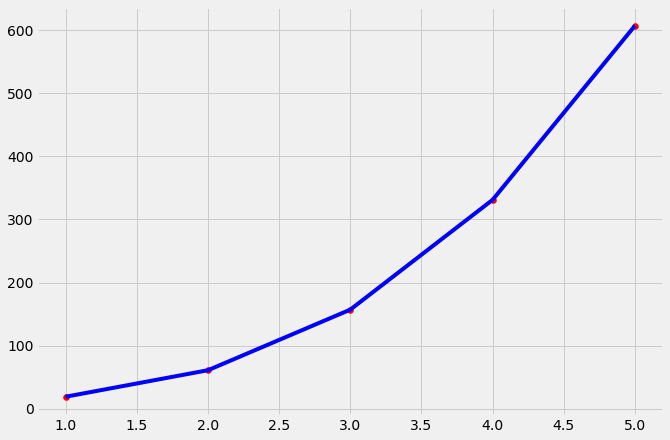

In [28]:
plt.figure(figsize=(10, 7))
plt.scatter(xs, ys, color='r')
plt.plot(xs, poly_regression, 'b', )

In [29]:
error = coefficient_of_determination(ys, poly_regression)
error

1.0

# MULTIPLE VARIABLES

In [30]:
x1 = np.array([0, 4, 6.3, 8, 9.2, 10.3, 11.2, 12, 12.6]) 
x2 = np.array([0, 0.6, 1, 1.3, 1.6, 1.8, 1.9, 2, 2.1])

y = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9 ])

ones = np.array([1 for i in range(0, 9)])
xs_combined = np.array([ones, x1, x2])
X =  xs_combined.T
X

array([[ 1. ,  0. ,  0. ],
       [ 1. ,  4. ,  0.6],
       [ 1. ,  6.3,  1. ],
       [ 1. ,  8. ,  1.3],
       [ 1. ,  9.2,  1.6],
       [ 1. , 10.3,  1.8],
       [ 1. , 11.2,  1.9],
       [ 1. , 12. ,  2. ],
       [ 1. , 12.6,  2.1]])

In [31]:
sum_of_y = sum(y)
xi1y = sum(x1 * y)
xi2y = sum(x2 * y)
#xi3y = sum(x3 * y)

m1 = np.array([[sum_of_y], [xi1y], [xi2y]])

# XT * X
X_transpose = X.T
dot = np.dot(X.T, X)

# XT * Y
m2 = np.dot(X.T, y.T)

m2

array([ 45. , 454.5,  76.4])

In [32]:
c2 = np.concatenate((dot, m1), axis=1)
c2

array([[  9.  ,  73.6 ,  12.3 ,  45.  ],
       [ 73.6 , 738.62, 124.1 , 454.5 ],
       [ 12.3 , 124.1 ,  20.87,  76.4 ]])

In [33]:
b = gaussian_elimination(3, c2)


The solution is: 
B0 = -0.11	B1 = 0.37	B2 = 1.52	

In [34]:
mlr = [b[0] + b[1] * x1 + b[2] * x2]
mlr

[array([-0.11301504,  2.28362447,  3.74545668,  4.83256306,  5.7343138 ,
         6.44669434,  6.93263356,  7.38150164,  7.75622748])]

In [35]:
error = coefficient_of_determination(y, mlr)
error

array([0.97935329, 0.99865929, 0.99073824, 0.98844731, 0.99101305,
       0.9966744 , 0.99992436, 0.99362433, 0.97421717])